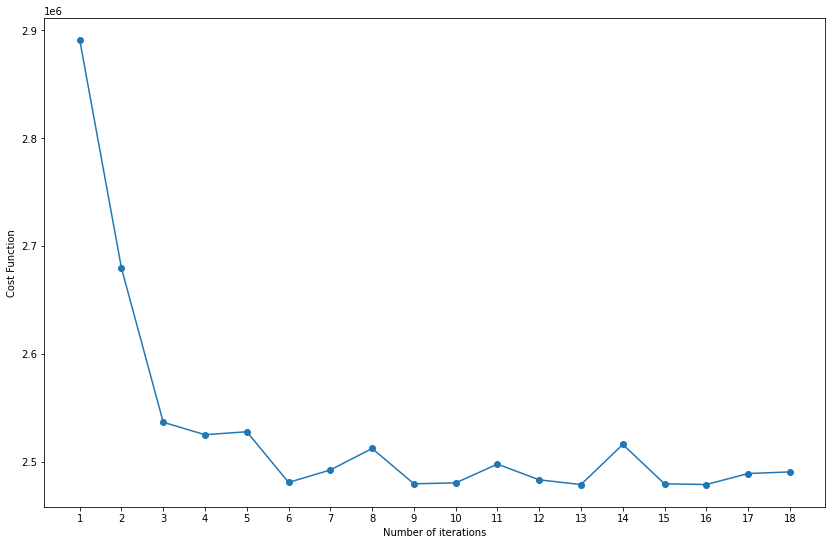

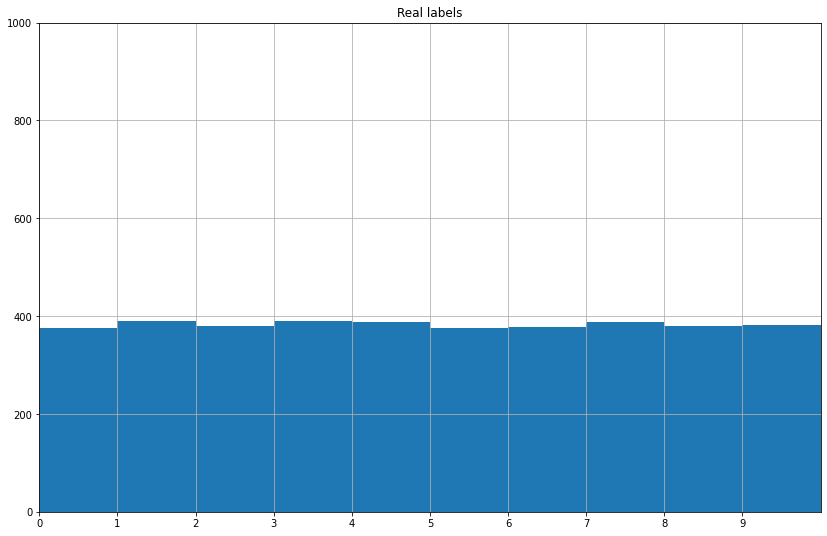


 Silhoette clustering for K-means clustering 

For n_clusters = 10 The average silhouette_score is : 0.19145651458610743
For n_clusters = 11 The average silhouette_score is : 0.18823512803011921
For n_clusters = 12 The average silhouette_score is : 0.18908869603020176
For n_clusters = 13 The average silhouette_score is : 0.18977163866813496
For n_clusters = 14 The average silhouette_score is : 0.18592953368501464
For n_clusters = 15 The average silhouette_score is : 0.18743640008344958

 Accuracy of K-means clusting for train dataset:  75 %



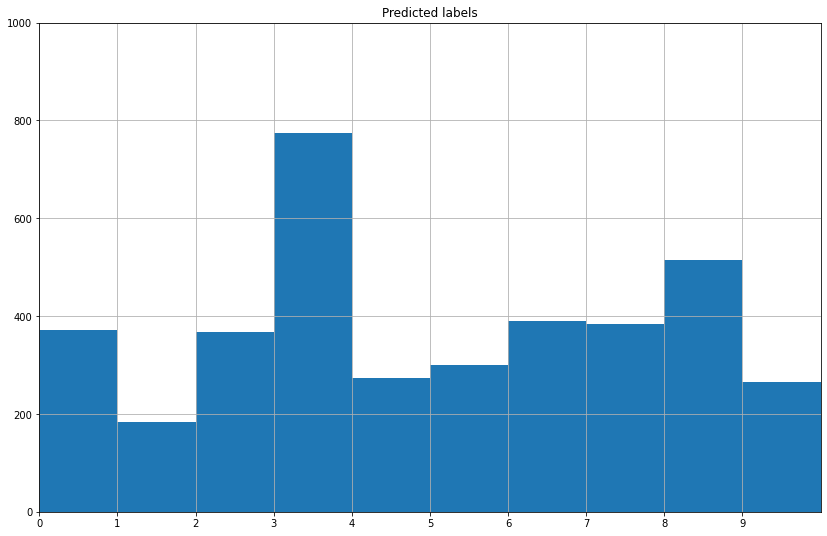


Accuracy of K-means clustering for testing dataset 73 %


Accuracy of HC for train dataset:  81 %



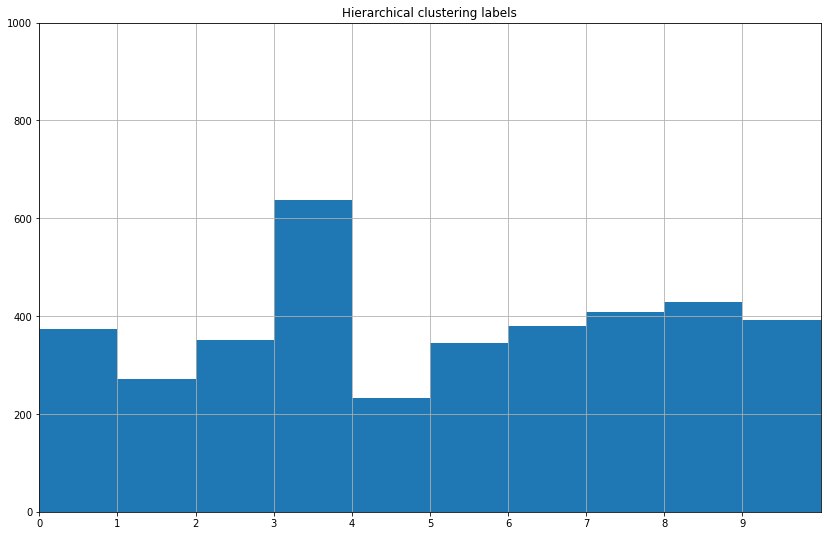


Accuracy of HC for testing dataset is:  86 % 


Silhoette clustering for Hierarchical clustering

For n_clusters = 10 The average silhouette_score is : 0.1745470931891432
For n_clusters = 11 The average silhouette_score is : 0.17871212582446985
For n_clusters = 12 The average silhouette_score is : 0.17304962576959765
For n_clusters = 13 The average silhouette_score is : 0.17437624446800096
For n_clusters = 14 The average silhouette_score is : 0.17388412758382546
For n_clusters = 15 The average silhouette_score is : 0.16901128866557988


In [35]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from numpy import genfromtxt
from sklearn.metrics import accuracy_score
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
from sklearn.metrics import confusion_matrix
import seaborn as sns
from scipy.stats import mode

%matplotlib inline
#loading datasets

train = genfromtxt('optdigits.tra', delimiter=',')
test = genfromtxt('optdigits.tes', delimiter=',')

pixels = np.zeros([train.data.shape[0], train.data.shape[1] -1])
lab = np.zeros([1, train.data.shape[0]])
for row in range(train.data.shape[0]):
  pixels[row] = train[row, 0:(train.data.shape[1] -1)]
  lab[0, row] = train[row, train.data.shape[1] -1]
pixels = pixels.astype(int)
lab = lab.astype(int)
real_labels = lab[0]


#Visualization of quantization error
costFunction = []
for i in range(1,19):
      km = KMeans(n_clusters=10, init = 'random', max_iter=i, tol = 1e-04)
      km.fit(pixels)
      costFunction.append(km.inertia_)

plt.figure(figsize=(14, 9))
plt.plot(range(1,19), costFunction, marker = 'o')
plt.xticks(range(1,19))
plt.xlabel('Number of iterations')
plt.ylabel('Cost Function')
plt.show()

#Plotting histogram 
plt.figure(figsize=(14, 9))
plt.hist(real_labels, bins = [0,1,2,3,4,5,6,7,8,9,10]) 
plt.title("Real labels")
plt.xticks(range(0,10))
plt.grid(True)
plt.axis([0, 10, 0, 1000])
plt.show()

#Plotting silhoette 
print("\n Silhoette clustering for K-means clustering \n")
y = lab
X = pixels
range_n_clusters = [10, 11, 12, 13, 14, 15]
silhouette_kmeans = []
for n_clusters in range_n_clusters:
    
    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)


    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_kmeans.append(silhouette_avg)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

import scipy
def find_permutation(n_clusters, real, labels):
    permutation=[]
    for i in range(n_clusters):
        idx = labels == i
        new_label=scipy.stats.mode(real[idx])[0][0]  # Choose the most common label among data points in the cluster
        permutation.append(new_label)
    return permutation

permutation3 = find_permutation(10, real_labels, km.labels_)
labels_train = [ permutation3[label] for label in km.labels_]

#Computing accuracy of K-means for train dataset
acc_train = accuracy_score(real_labels, labels_train)
print("\n Accuracy of K-means clusting for train dataset: ", int(100*acc_train),"%\n")

#Plotting histogram of predicted labels for K-means
plt.figure(figsize=(14, 9))
plt.hist(labels_train, bins = [0,1,2,3,4,5,6,7,8,9,10]) 
plt.title("Predicted labels")
plt.xticks(range(0,10))
plt.axis([0, 10, 0, 1000])
plt.grid(True)
plt.show()

"""
mat1 = confusion_matrix(real_labels, labels_train)
sns.heatmap(mat1.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');
"""

# Second part 
# Loading Testing Dataset and finding the closest cluster and assign to this digit the label of the closest cluster 
test = genfromtxt('optdigits.tes', delimiter=',')

pixels_test = np.zeros([test.data.shape[0], test.data.shape[1] -1])
lab_test = np.zeros([1, test.data.shape[0]])
for row in range(test.data.shape[0]):
  pixels_test[row] = test[row, 0:(train.data.shape[1] -1)]
  lab_test[0, row] = test[row, train.data.shape[1] -1]
pixels_test = pixels_test.astype(int)
lab_test = lab_test.astype(int)
real_labels_test = lab_test[0]

#Getting pridicted digits
labels_test = km.predict(pixels_test)
#print(real_labels_test, labels_test)
#Permute labels
labels_test_pre = np.zeros_like(labels_test)
for j in range(10):
    mask = (labels_test == j)
    labels_test_pre[mask] = mode(real_labels_test[mask])[0]

#Global performance
acc_test = accuracy_score(real_labels_test, labels_test_pre)
print("\nAccuracy of K-means clustering for testing dataset", int(100*acc_test),"%\n")

#Hierarchital clustering 
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=10, affinity='euclidean', linkage='ward')
hier_clustering = cluster.fit(pixels)
permutation5 = find_permutation(10, real_labels, hier_clustering.labels_)
hier_labels = [ permutation5[label] for label in hier_clustering.labels_]
acc_hier = accuracy_score(real_labels, hier_labels)
print("\nAccuracy of HC for train dataset: ", int(100*acc_hier),"%\n")

"""
#Plotting dendrogram
from scipy.cluster.hierarchy import dendrogram, linkage
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(14, 9))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(pixels, method='ward'))
plt.axhline(y=410, color='r', linestyle='--')
plt.ylabel('Distance')
plt.show()
#Computing silhoette coeff
silhouette_avg = silhouette_score(pixels, hier_clustering.labels_)
print('For HC, where clusters = 10, The average silhouette_score is : ' , silhouette_avg)
"""
#Plotting histogram 
plt.figure(figsize=(14, 9))
plt.hist(hier_labels, bins = [0,1,2,3,4,5,6,7,8,9,10]) 
plt.title("Hierarchical clustering labels")
plt.xticks(range(0,10))
plt.grid(True)
plt.axis([0, 10, 0, 1000])
plt.show()

#Testing hierarchital clustering

#Getting pridicted labels
labels_test = hier_clustering.fit_predict(pixels_test)

#Permute labels
permutation6 = find_permutation(10, real_labels_test, labels_test)
labels_test_per = [ permutation6[label] for label in labels_test]

#Global performance
acc_test_hier = accuracy_score(real_labels_test, labels_test_per)
print("\nAccuracy of HC for testing dataset is: ", int(100*acc_test_hier), "% \n")

#Varying number of clusters in range 10-15
print("\nSilhoette clustering for Hierarchical clustering\n")
y = lab
X = pixels
range_n_clusters = [10, 11, 12, 13, 14, 15]
silhouette_hier = []
for n_clusters in range_n_clusters:

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='ward')
    cluster_labels = clusterer.fit_predict(X)


    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg_hier = silhouette_score(X, cluster_labels)
    silhouette_hier.append(silhouette_avg)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg_hier )


Confusion matrix of HC for testing dataset


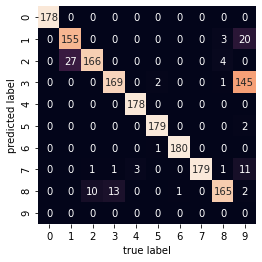

In [12]:
#Confusion matrix
mat = confusion_matrix(real_labels_test, labels_hier_pre)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

Confusion matrix of K-means for testing dataset


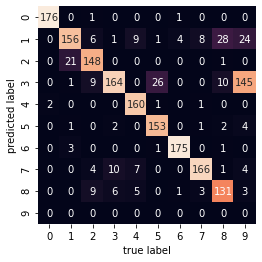

In [16]:
#Confusion matrix
mat = confusion_matrix(real_labels_test, labels_test_pre)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

Comparation graph of silhouette coefficients![alt text](https://)

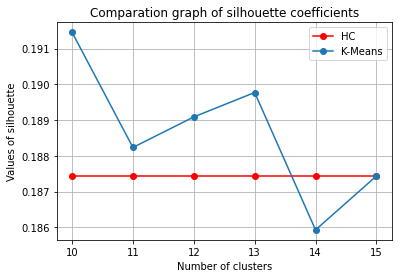

In [30]:

plt.plot(range(10,16), silhouette_hier, marker = 'o', color = 'red')
plt.plot(range(10,16), silhouette_kmeans, marker = 'o')
plt.xticks(range(10,16))
plt.xlabel('Number of clusters')
plt.ylabel('Values of silhouette')
plt.title('Comparation graph of silhouette coefficients')
plt.grid()
plt.legend(('HC', 'K-Means'))
plt.show()

In [36]:
print(int(acc_test*1797), int(acc_test_hier*1797) )

1321 1549
